<a href="https://colab.research.google.com/github/enigma11-droid/BigDataTweetSentimentAnalysis/blob/main/DS432Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports and Loading Data

In [ ]:
# Import standard Python data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
weekly = pd.read_csv('weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


# Part 1

In [ ]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
weekly["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

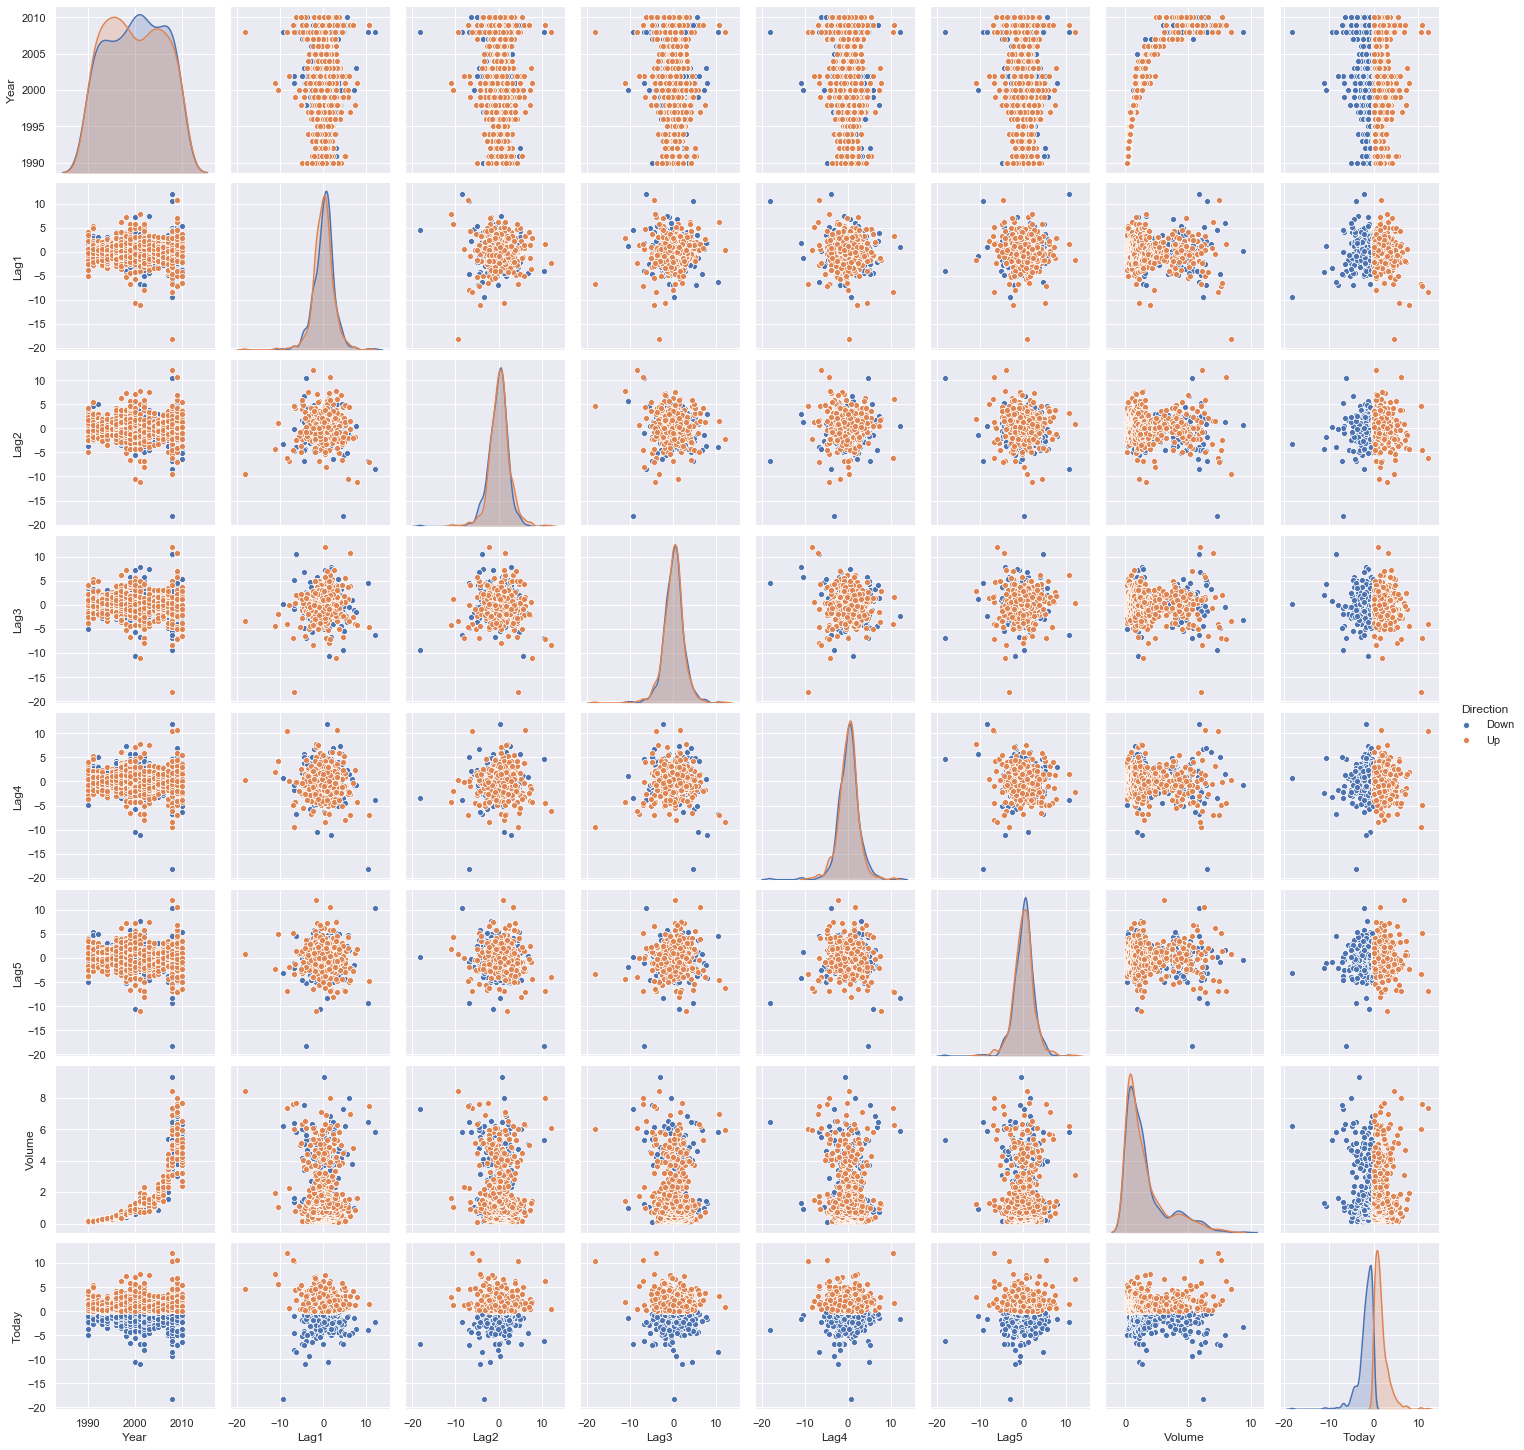

In [ ]:
sns.pairplot(weekly, hue = "Direction");

From the initial summary statistics and scatterplot matrix, there don't appear to be any obvious patterns aside from the fact the volume of shares traded each week has grown quite a lot from 1990 to 2010. Looking more closely at the scatterplot of just volume over time, we can see that the number of shares traded each week has grown exponentially over the 21 years covered by the data.

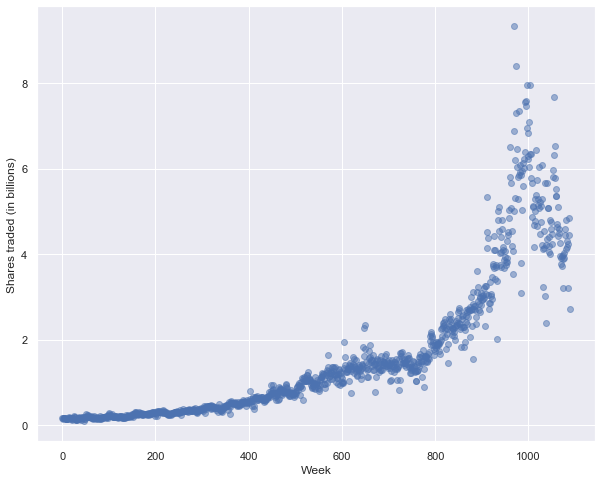

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes()
ax.scatter(x = weekly.index, y = weekly["Volume"], alpha = 0.5)
ax.set(xlabel = "Week", ylabel = "Shares traded (in billions)");

In [ ]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Lastly, we look at the matrix of correlations between the variables. Looking at the last row, we can see that each of the lag variables is only correlated very weakly with today's returns. The sole substantial value of 0.842, between Volume and Year, aligns with the strong correlation we saw in the above scatterplot.

# Part2

In [ ]:
# Using the Logit class from StatsModels
# First encode response numerically
endog = (weekly["Direction"] == "Up").astype("int64")
exog = sm.add_constant(weekly.drop(columns = ["Direction", "Year", "Today"]))
logit_mod = sm.Logit(endog, exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                0.006580
Time:                        12:51:51   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [ ]:
pd.DataFrame({"Estimate": logit_res.params, "Std. Error": logit_res.bse, "z value": logit_res.tvalues,
             "Pr(>|z|)": logit_res.pvalues})

,Estimate,Std. Error,z value,Pr(>|z|)
const,0.266864,0.085930,3.105613,0.001899
Lag1,-0.041269,0.026410,-1.562610,0.118144
Lag2,0.058442,0.026865,2.175384,0.029601
Lag3,-0.016061,0.026663,-0.602376,0.546924
Lag4,-0.027790,0.026463,-1.050141,0.293653
Lag5,-0.014472,0.026385,-0.548501,0.583348
Volume,-0.022742,0.036898,-0.616333,0.537675


The only statistically significant predictor is Lag2, with a p-value of 0.0296 providing evidence at the 5% significance level to reject the null hypothesis that it is not related to the response Direction. None of the other predictors are statistically significant, though Lag1 is somewhat near the border of being significant at the 10% level, with a p-value of 0.1181.

# Part 3
*Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.*

In order to produce a confusion matrix that helps us better visualize the incorrect predictions, we use seaborn to convert the confusion matrix into a heatmap.

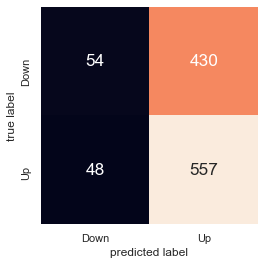

In [ ]:
mat = pd.DataFrame(logit_res.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
logit_preds = pd.Series(logit_res.predict()).apply(lambda x: "Up" if (x > 0.5) else "Down")
(logit_preds == weekly["Direction"]).mean()

0.5610651974288338

As we can see in the confusion matrix, the logistic regression model using the five lag variables along with Volume as the predictors, and a prediction threshold of 0.5, correctly predicted 54 down weeks out of a total of 484 actual down weeks and 557 up days out of a total of 605 actual up weeks. This means that the model correctly predicted the direction for 611 weeks out of the 1089 for an accuracy of 0.5611. While this seems to be better than random chance, it is important to note that the model was trained on the entire data set, so 0.5611 is the training accuracy. Moreover, a naive strategy of simply saying that every week will be an up week would have resulted in 605 correctly predicted weeks out of 1089, which is a very similar level of overall accuracy.

To look a little closer at the confusion matrix, let's assume that our goal is to correctly predict when the market will go up. In this case, up weeks will be considered as positive ( + ) and down weeks as negative ( − ). Having set this convention, we can now consider four important quantities associated with the confusion matrix: true positive rate (i.e. sensitivity or recall), false positive rate, positive predictive value (i.e. precision), and negative predictive value. The true positive rate is the number of correctly predicted positives divided by the overall number of positives -- the number of correctly predicted up weeks (557) over the total number of up weeks (605) for a value of  557/605≈0.92  for this model. While this is a pretty high value, which is good, the false positive rate -- the number of incorrectly predicted positives (weeks incorrectly predicted to be up weeks = 430 weeks) divided by the overall number of negatives (the total number of down weeks = 484 weeks) -- is comparably high at  430/484≈0.888 , which might be quite bad depending on our sensitivity to losing money on an incorrectly predicted down week. Next is the positive predictive value, which is the number of true positives divided by the total number of predicted positives; in our case this is  557/987≈0.564 . This is better than chance, but as already noted we would have a comparable positive predictive value if we just predicted that every week would be an up week. Lastly is the negative predictive value, which is the number of true negatives divided by the total number of predicted negatives; in our case this is  54/102≈0.529 .

# Part 4
*Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010.)*

In [ ]:
train_mask = (weekly["Year"] < 2009)

In [ ]:
# Using the Logit class from StatsModels
# First encode response numerically
train_endog = (weekly.loc[train_mask, "Direction"] == "Up").astype("int64")
train_exog = sm.add_constant(weekly.loc[train_mask, "Lag2"])
logit_mod = sm.Logit(train_endog, train_exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                0.003076
Time:                        12:55:39   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [ ]:
test_exog = sm.add_constant(weekly.loc[~train_mask, "Lag2"])
test_endog = weekly.loc[~train_mask, "Direction"]
logit_test_probs = logit_res.predict(test_exog)
logit_test_preds = pd.Series(logit_test_probs).apply(lambda x: "Up" if (x > 0.5) else "Down")


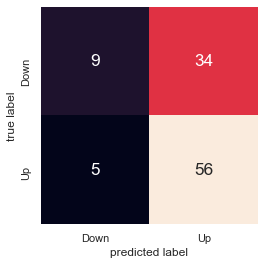

In [ ]:
mat = pd.DataFrame(confusion_matrix(test_endog, logit_test_preds), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
(logit_test_preds == weekly.loc[~train_mask, "Direction"]).mean()

0.625

In [ ]:
(weekly.loc[~train_mask, "Direction"] == "Up").mean()

0.5865384615384616

After fitting a logistic regression model on the data from 1990 through 2008 using only Lag2 as the predictor, the model correctly predicted the market direction for 62.5% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it still is less than a 10% improvement over naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is  56/61≈0.918 , while the false positive rate is  34/43≈0.791 . In addition, the positive predictive value is  56/90≈0.622  and the negative predictive value is  9/14≈0.643 .

# Part 5
*Repeat (d) using linear discriminant analysis (LDA).*


In [ ]:
# First separate out the training and test sets
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the LDA model using the training set
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

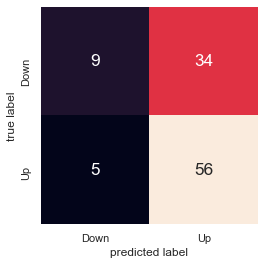

In [ ]:
y_pred = lda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
lda_clf.score(X_test, y_test)

0.625

After performing linear discriminant analysis on the data from 1990 through 2008 using only Lag2 as the predictor, we ended up with an identical confusion matrix to the one from Part 4 with the logistic regression model. As we saw in Part 4, the model correctly predicted the market direction for 62.5% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it still is less than a 10% improvement over naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is  56/61≈0.918 , while the false positive rate is  34/43≈0.791 . In addition, the positive predictive value is  56/90≈0.622  and the negative predictive value is  9/14≈0.643 .



# Part 6
*Repeat (d) using quadratic discriminant analysis (QDA).*

In [ ]:
# First separate out the training and test sets
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

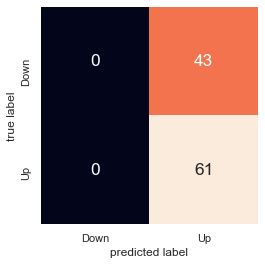

In [ ]:
y_pred = qda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
qda_clf.score(X_test, y_test)

0.5865384615384616

After performing quadratic discriminant analysis on the data from 1990 through 2008 using only Lag2 as the predictor, we ended up with a model that ended up predicting that every week in 2009 and 2010 would be an up week. The model correctly predicted the market direction for 58.7% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it is the same result one would get from naively predicting that every week will be an up week, so to better compare the performance of this model to the logistic regression and linear discriminant analysis models testing on a larger test set would be necessary. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is  61/61=1 , while the false positive rate is  43/43≈1 . In addition, the positive predictive value is  61/104≈0.587  and since there were no negative predictions discussing the negative predictive value is meaningless.

# Part 7
*Repeat (d) using K-nearest neighbors (KNN) with K = 1.*


In [ ]:
# First separate out the training and test sets
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Set NumPy random seed for consistency and reproducibility of our results
np.random.seed(312)

# Fit the QDA model using the training set
knn_1_clf = KNeighborsClassifier(n_neighbors = 1)
knn_1_clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

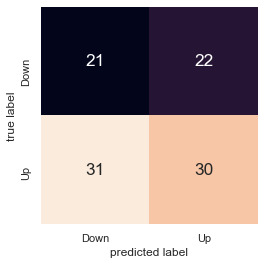

In [ ]:
y_pred = knn_1_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
knn_1_clf.score(X_test, y_test)

0.49038461538461536

After performing  k -nearest neighbors classification with  k=1  on the data from 1990 through 2008 using only Lag2 as the predictor, the model correctly predicted the market direction for 49% of the weeks in the held-out data (the data from 2009 and 2010). While this essentially only as good as picking the direction randomly, it had worse performance than naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is  30/61≈0.492 , while the false positive rate is  22/43≈0.512 . In addition, the positive predictive value is  30/52≈0.577  and the negative predictive value is  21/52≈0.404 .

# Part 8(Which method is best)

If we are only considering overall prediction accuracy, it appears that logistic regression and linear discriminant analysis were equally good as the models that performed the best on this data. Quadratic discriminant analysis came in third place, and  k -nearest neighbors with  k=1  a distant fourth. As noted above in Part 7,  k -nearest neighbors didn't perform any better than randomly guessing, and in fact performed worse than naively predicting every week would be an up week. One thing that I would be cautious of, though, is the fact that aside from KNN, the other three models very strongly preferred to predict up weeks, and therefore had high false positive rates. This might be okay for an investor who is comfortable with taking more risks and has can afford losing money to down weeks that were incorrectly predicted to be up weeks, but a risk-averse investor would probably want to use a less aggressive model, or at least require a higher probability threshold than 50% before accepting a prediction of an up week.

# Part2
*This problem involves predicting Salary from the Hitters data set which is part of the ISLR package.(a) Remove the observations for whom the salary information is unknown, and log-transform the salaries.*


In [ ]:
import numpy as np
import pandas as pd
# import patsy as pt
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# from IPython.display import HTML
# from ipywidgets import interact
# import ipywidgets as widgets
# import copy
# import warnings
# warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
hitters_df = pd.read_csv('Hitters.csv')

# Drop null observations
hitters_df = hitters_df.dropna()
assert hitters_df.isnull().sum().sum() == 0

f = 'np.log(Salary) ~ ' + ' + '.join(hitters_df.columns.drop(['Salary']))
y, X = pt.dmatrices(f, hitters_df)

pd.DataFrame(X, columns=X.design_info.column_names).head()


,Intercept,League[T.N],Division[T.W],NewLeague[T.N],AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,1.0,1.0,1.0,1.0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
1,1.0,0.0,1.0,0.0,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
2,1.0,1.0,0.0,1.0,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
3,1.0,1.0,0.0,1.0,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
4,1.0,0.0,1.0,0.0,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


##(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [ ]:
# Index for Training set of 200
np.random.seed(1)
train_sample = np.random.choice(np.arange(len(hitters_df)), size=200, replace=False)
train = np.asarray([(i in train_sample) for i in hitters_df.index])

##(c) Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter . Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

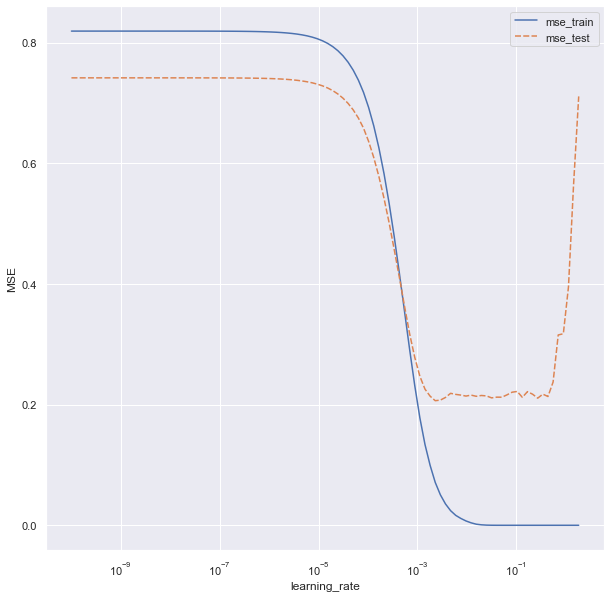

,mse_train,mse_test
learning_rate,,
0.00229,0.071057,0.206525


In [ ]:
# Gradient boosting

max_features = 'auto'
tree_count   = 1000

# np.arange(0.0001, 1.2, 0.01)

results = []
for learning_rate in np.logspace(-10, np.log(1.3), 100): 
    regr   = GradientBoostingRegressor(max_features=max_features, 
                                       random_state=1, 
                                       n_estimators=tree_count,
                                       learning_rate=learning_rate)
    regr = regr.fit(X[train], y[train])
    y_hat_train = regr.predict(X[train])
    y_hat_test  = regr.predict(X[~train])
    
    mse_train = metrics.mean_squared_error(y[train], y_hat_train)
    mse_test  = metrics.mean_squared_error(y[~train], y_hat_test)
    
    results += [[learning_rate, mse_train, mse_test]]

# Plot
df = pd.DataFrame(np.asarray(results), 
                  columns=['learning_rate', 'mse_train', 'mse_test']).set_index('learning_rate')
plt.figure(figsize=(10,10))
ax  = sns.lineplot(data=df)
ax.set_xscale('log')
plt.ylabel('MSE')
plt.show();

# Show best learning rate
display(df[df['mse_test'] == df['mse_test'].min()])

In [ ]:
# Naive ols
model = sm.OLS(y[train], X[train]).fit()
y_hat = model.predict(X[~train])

mse_test = metrics.mean_squared_error(y[~train], y_hat)
print('MSE test: {}'.format(np.around(mse_test, 3)))

MSE test: 0.455


## (d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

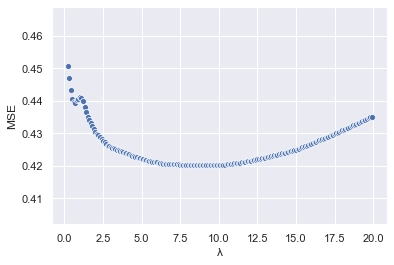

RMSE Train CV: 0.6482094156231718
@Lambda: 9.300000000000002
MSE test: 0.469
RMSE test: 0.685


In [ ]:
def lasso_cv(X, y, λ, k):
    """Perform the lasso with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model = Lasso(alpha=λ, copy_X=True, fit_intercept=True, max_iter=10000,
                      normalize=False, positive=False, precompute=False, random_state=0,
                      selection='cyclic', tol=0.0001, warm_start=False).fit(X_train, y_train)
        
        # Measure MSE
        y_hat = model.predict(X_test)
        #print(y_test)
        MSEs += [metrics.mean_squared_error(y_test, y_hat)]
    return MSEs

X_train = pd.DataFrame(X[train], columns=X.design_info.column_names)
y_train = pd.DataFrame(y[train], columns=['Price'])

#lambdas = np.arange(.000001, 0.01, .0001)

lambdas = np.arange(0.2, 20, .1)

MSEs    = [] 
for l in lambdas:
    MSEs += [np.mean(lasso_cv(X_train, y_train, λ=l, k=10))]

sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': lambdas, 'MSE': MSEs}))
plt.show();

# Choose model
lamb = min(zip(MSEs, lambdas))
print('RMSE Train CV: {}\n@Lambda: {}'.format(np.sqrt(lamb[0]), lamb[1]))


# Use chosen model on test set prediction
model = Lasso(alpha=lamb[1], copy_X=True, fit_intercept=True, max_iter=10000,
              normalize=False, positive=False, precompute=False, random_state=0,
              selection='cyclic', tol=0.0001, warm_start=False).fit(X[train], y[train])

y_hat = model.predict(X[~train])

mse = metrics.mean_squared_error(y[~train], y_hat)
rmse = np.sqrt(mse)

print('MSE test: {}'.format(np.around(mse, 3)))
print('RMSE test: {}'.format(np.around(rmse, 3)))

Boosting yields a test MSE of 0.207, which is significantly better than naive OLS (0.455) and the Lasso (0.469).

It is interesting that naive OLS with all features outperforms the lasso. This suggests that the lasso is unable to identify redundant features in the model.

## (e) Which vakriable appear to be the most important predictors in the boosted model?

0.20668821214705288


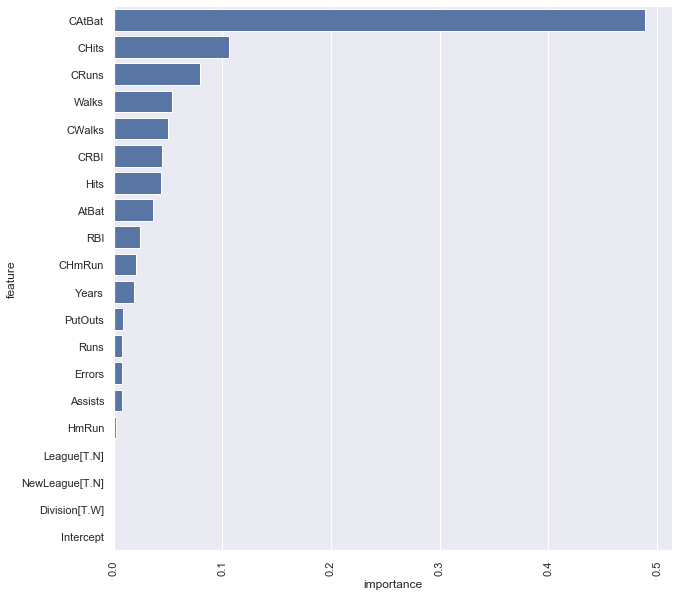

In [ ]:
max_features = 'auto'
tree_count   = 1000
learning_rate = 0.00229

regr = GradientBoostingRegressor(max_features=max_features, 
                                       random_state=1, 
                                       n_estimators=tree_count,
                                       learning_rate=learning_rate)

regr = regr.fit(X[train], y[train])
y_hat_test  = regr.predict(X[~train])

mse_test  = metrics.mean_squared_error(y[~train], y_hat_test)
print(mse_test)

# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X.design_info.column_names, 'importance': regr.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);

The boosting model suggests that CAtBat – Number of times at bat during his career – is by far the most important predictor of Salary.

Number of walks during his career (CWalks) is also predictive of salary, but it seems likely that this feature would be covariant with CAtBat.

## (g) Apply random forests to the training set. What is the test set MSE for this approach.

In [ ]:
# Bagging with 100 trees
# although I'm using RandomForestRegressor algo here this is Bagging because max_features = n_predictors

max_features = X.shape[1]
tree_count   = 1000

regr   = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)
regr.fit(X[train], y[train])
y_hat = regr.predict(X[~train])

mse = metrics.mean_squared_error(y[~train], y_hat)
rmse = np.sqrt(mse)

print('MSE test: {}'.format(np.around(mse, 3)))
print('RMSE test: {}'.format(np.around(rmse, 3)))

MSE test: 0.207
RMSE test: 0.455


Bagging achieves a test MSE of 0.208 which is equivalent to that achieved by boosting. Bagging has the advantage here that the result was achived without need to tune hyper-parameters.

# Answer 3
*Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear seperation between the classes. Show that in this setting, a support vector machine with a polynomial kernal (with degree greater than 1) or a radial kernal will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.*


In [ ]:
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification
# Generate noisy moon shaped data
n_samples = 100
noise     = .3
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=0)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [ ]:
# Generate noisy moon shaped data
n_samples = 100
noise     = .3
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=0)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

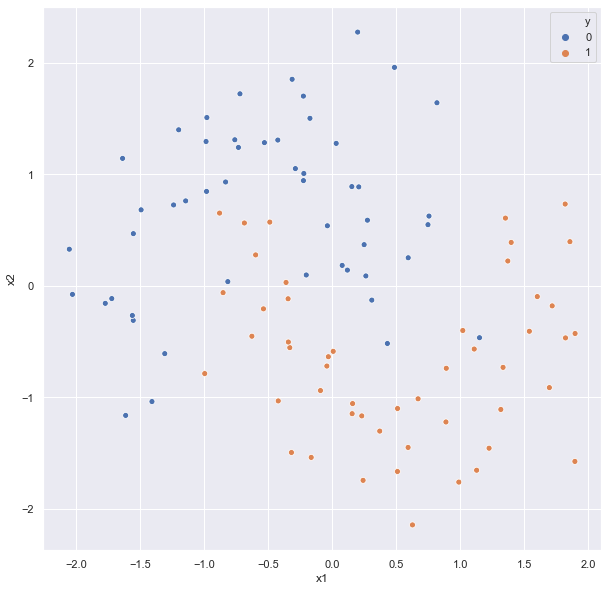

In [ ]:
# Plot data
df = pd.concat([pd.DataFrame(data=X_train, columns=['x1', 'x2']), pd.Series(y_train, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);


In [ ]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();

### LinearKernel


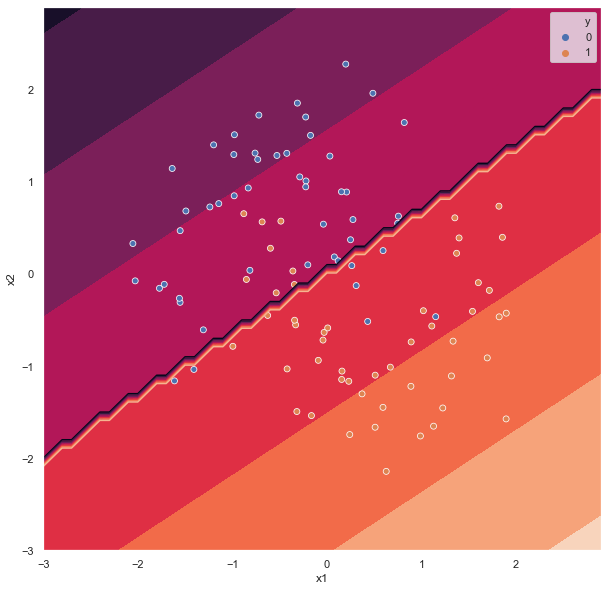

Training accuracy: 0.85
Test accuracy    : 0.83


In [ ]:
model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

### Ploynomial Kernel

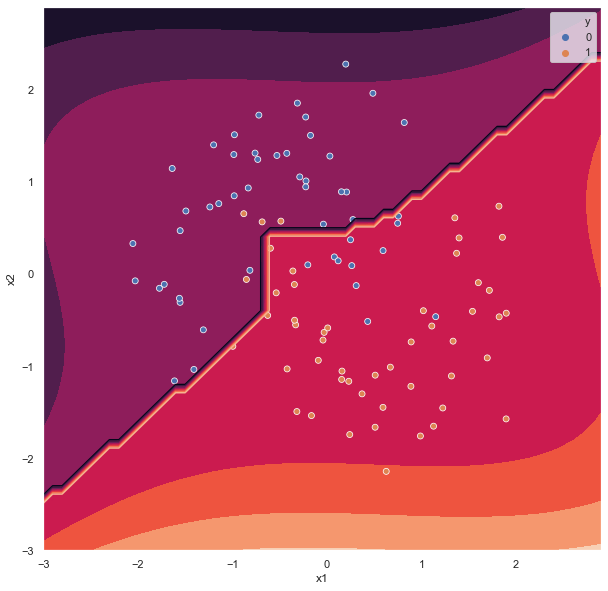

Training accuracy: 0.85
Test accuracy    : 0.87


In [ ]:
model = svm.SVC(kernel='poly', degree=3, gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

### Radial Kernel

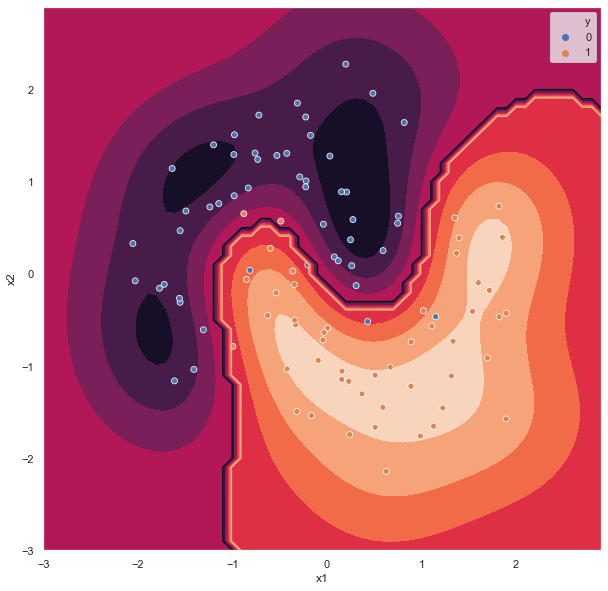

Training accuracy: 0.93
Test accuracy    : 0.91


In [ ]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

Comment In this setting an SVM with a radial kernel outperforms both linear and polynomial kernel models. The linear kernel model is the least effective because the data is not linearly separable